In [4]:
import csv
import re
import pandas as pd


spam_csv = pd.read_csv('spamtexts.csv', encoding='latin-1')
df = pd.DataFrame(spam_csv)

In [5]:
ham = 1
spam = 2

# CREATING NEW COLUMN 'category' TO CATEGORIES HAM=0/SPAM=1
# REMOVING OLD COLUMN 'Category'
df.insert(1, 'category', 1)
df.loc[df['Category'] == 'spam', 'category'] = 2

df = df.drop(['Category'], axis=1)

In [7]:
# LOWER-CASING ALL THE TEXT
df.message = df.message.str.lower()

In [ ]:
message_char_list = []

for row in df.message:
    for character in row:
        if character not in message_char_list:
            print(character)
            message_char_list.append(character)
        else:
            pass

In [9]:
print(message_char_list)

['g', 'o', ' ', 'u', 'n', 't', 'i', 'l', 'j', 'r', 'p', ',', 'c', 'a', 'z', 'y', '.', 'v', 'b', 'e', 's', 'w', 'd', 'f', 'h', 'm', 'k', '2', '1', '0', '5', 'x', '8', '7', 'q', '(', ')', '&', "'", '4', '3', '!', '?', 'â', '£', '*', '9', '6', '>', '/', '+', ':', '=', '\x92', '-', 'ã', 'º', '\x80', '\x98', '¼', ';', '#', '"', '@', '$', '\x9c', '~', '|', '_', '\x93', '<', '¦', '\\', '¨', '^', '\x94', '%', '\x91', '[', ']', '\x99', '\x96', '»', '©', '\x89', '¬', '\r', '\n', '\t', 'é', '\x88', '¥', '¾', '¡']


In [ ]:
import string
alphabet = list(string.ascii_lowercase)
punctuation = list(string.punctuation)
numbers = list(string.digits)
whitespace = list(string.whitespace)

print(alphabet, punctuation, numbers, whitespace)

In [11]:
dirty_char_list = []

for x in message_char_list:
    if x not in alphabet:
        if x not in numbers:
            if x not in punctuation:
                dirty_char_list.append(x)

dirty_char_list.remove(' ')

In [ ]:
print(dirty_char_list)

Plan is to create a function that checks to see if character is in the dirty_char_list. 
* If so it will replace the character depending on what it is.
* If it is a number, replace with number " ",
* If it is punctuation, replace with " ",
* Otherwise, replace it with " ".
* Finally replace whitespace where whitespace len > 1, to " ".

In [ ]:
df_new = df

print(df_new.message)

In [14]:
for x in dirty_char_list:
    df_new.message = df_new.message.str.replace(x, "")

In [15]:
for x in punctuation:
    df_new.message = df_new.message.str.replace(x, "")

C:\Users\smbal\AppData\Local\Temp\ipykernel_38136\585386443.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_new.message = df_new.message.str.replace(x, "")


In [16]:
for x in numbers:
    df_new.message = df_new.message.str.replace(x, 'number')

In [105]:
df_new.to_csv("preprocessing_spamtexts.csv", index=False)

In [17]:
df_new.head(10)

,category,message
0,1,go until jurong point crazy available only in ...
1,1,ok lar joking wif u oni
2,2,free entry in number a wkly comp to win fa cup...
3,1,u dun say so early hor u c already then say
4,1,nah i dont think he goes to usf he lives aroun...
5,2,freemsg hey there darling its been number week...
6,1,even my brother is not like to speak with me t...
7,1,as per your request melle melle oru minnaminun...
8,2,winner as a valued network customer you have b...
9,2,had your mobile numbernumber months or more u ...


In [18]:
# Splitting data into two new dataframes based on category
df_ham, df_spam = [x for _, x in df_new.groupby(df_new.category == 2)]

In [19]:
df_ham.head(10)

,category,message
0,1,go until jurong point crazy available only in ...
1,1,ok lar joking wif u oni
3,1,u dun say so early hor u c already then say
4,1,nah i dont think he goes to usf he lives aroun...
6,1,even my brother is not like to speak with me t...
7,1,as per your request melle melle oru minnaminun...
10,1,im gonna be home soon and i dont want to talk ...
13,1,ive been searching for the right words to than...
14,1,i have a date on sunday with will
16,1,oh kim watching here


In [20]:
#print(df_ham, df_spam)
print(len(df_ham), len(df_spam)) #expecting 4825 ham 747 spam

4825 747


In [108]:
# train = 0:3377
df_ham.iloc[0:3378].to_csv("nonspam_train.csv", index=False, header=False)
# test = 3378:4824
df_ham.iloc[3379:4824].to_csv("nonspam_test.csv", index=False, header=False)

In [109]:
# train = 0:523
df_spam.iloc[0:523].to_csv("spam_train.csv", index=False, header=False)
# test = 524:746
df_spam.iloc[524:746].to_csv("spam_test.csv", index=False, header=False)

In [110]:
train_start = 0
train_end = 523
test_start = 524
test_end = 746

In [111]:
# Creating four more CSV's that have equal amount of spam/ham in train/test sets.
df_ham.iloc[train_start:train_end].to_csv("eq_nonspam_train.csv", index=False)
df_ham.iloc[test_start:test_end].to_csv("eq_nonspam_test.csv", index=False)
df_spam.iloc[train_start:train_end].to_csv("eq_spam_train.csv", index=False)
df_spam.iloc[test_start:test_end].to_csv("eq_spam_test.csv", index=False)

In [21]:
word_list = []
for message in df_new.message.str.split(' '):
    word_list.extend(message)

In [22]:
print(len(word_list))

87265


In [146]:
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

In [24]:
word_dict = {}
temp_holder = []

In [25]:
for word in word_list:
    if word in stop_words:
        pass
    elif word not in temp_holder:
        temp_holder.append(word)
        word_dict[word] = word_list.count(word)
    else:
        pass

In [26]:
del word_dict['']

In [100]:
sorted_dict = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)
#print(sorted_dict)

In [128]:
word_freq_df = pd.DataFrame.from_dict(word_dict, orient='index', columns=['frequency'])

In [130]:
word_freq_df.insert(0, "word", word_freq_df.index)

In [132]:
word_freq_df = word_freq_df.reset_index(drop=True)

In [136]:
word_freq_df.sort_values('frequency', ascending=False)

,word,frequency
24,number,1176
20,u,1130
102,call,575
119,im,473
204,ur,390
...,...,...
4842,themobyo,1
4841,converted,1
4839,memory,1
4838,feelingood,1


In [147]:
ham_word_list = []
for message in df_ham.message.str.split(' '):
    ham_word_list.extend(message)

spam_word_list = []
for message in df_spam.message.str.split(' '):
    spam_word_list.extend(message)

spam_word_dict = {}
ham_word_dict = {}
spam_temp = []
ham_temp = []

for word in ham_word_list:
    if word in stop_words:
        pass
    elif word not in ham_temp:
        ham_temp.append(word)
        ham_word_dict[word] = ham_word_list.count(word)
    else:
        pass

for word in spam_word_list:
    if word in stop_words:
        pass
    elif word not in spam_temp:
        spam_temp.append(word)
        spam_word_dict[word] = spam_word_list.count(word)
    else:
        pass

del spam_word_dict['']
del ham_word_dict['']

In [137]:
word_freq_df = word_freq_df.loc[word_freq_df.frequency >= 100 ]

In [140]:
word_freq_df = word_freq_df.sort_values('frequency', ascending=False)

In [148]:
spam_freq_df = pd.DataFrame.from_dict(spam_word_dict, orient='index', columns=['frequency'])
spam_freq_df.insert(0, "word", spam_freq_df.index)
spam_freq_df = spam_freq_df.reset_index(drop=True)
spam_freq_df = spam_freq_df.sort_values('frequency', ascending=False)
spam_freq_df = spam_freq_df.loc[spam_freq_df.frequency >= 100 ]

In [150]:
ham_freq_df = pd.DataFrame.from_dict(ham_word_dict, orient='index', columns=['frequency'])
ham_freq_df.insert(0, "word", ham_freq_df.index)
ham_freq_df = ham_freq_df.reset_index(drop=True)
ham_freq_df = ham_freq_df.sort_values('frequency', ascending=False)
ham_freq_df = ham_freq_df.loc[ham_freq_df.frequency >= 100 ]

In [28]:
max_words = 2500
x = 0

freq_word_list = []
# Writing the most frequent 2500 words into the dictionary representing the features.
with open("dictionary.txt", 'w') as f: 
    for key, value in sorted_dict:
        if x <= max_words:
            f.write(f'{key} {value}\n')
            freq_word_list.append(key)
            x += 1
        else:
            break

In [ ]:
freq_word_list

In [ ]:
for word in freq_word_list:
    print(freq_word_list.index(word))

In [30]:
max_words = 2500
x = 0

# Writing the most frequent 2500 words without their count.
with open("freq_dictionary.txt", 'w') as f: 
    for key, value in sorted_dict:
        if x < 2500:
            f.write(f'{key}\n')
            x += 1
        else:
            break

In [123]:
a_data = pd.read_csv("eq_nonspam_train.csv")
b_data = pd.read_csv("eq_nonspam_test.csv")
c_data = pd.read_csv("eq_spam_train.csv")
d_data = pd.read_csv("eq_spam_test.csv")

nstrain_df = pd.DataFrame(a_data)
nstest_df = pd.DataFrame(b_data)
strain_df = pd.DataFrame(c_data)
stest_df = pd.DataFrame(d_data)

In [124]:
train_df = pd.concat([nstrain_df, strain_df]).reset_index(drop=True) #1046 x 2
test_df = pd.concat([nstest_df, stest_df]).reset_index(drop=True) #444 x 2

In [125]:
train_df.head(10)

,category,message
0,1,go until jurong point crazy available only in ...
1,1,ok lar joking wif u oni
2,1,u dun say so early hor u c already then say
3,1,nah i dont think he goes to usf he lives aroun...
4,1,even my brother is not like to speak with me t...
5,1,as per your request melle melle oru minnaminun...
6,1,im gonna be home soon and i dont want to talk ...
7,1,ive been searching for the right words to than...
8,1,i have a date on sunday with will
9,1,oh kim watching here


In [126]:
# Initialize an empty list to store the features
features = []

# Iterate through each row in the dataframe
for index, row in train_df.iterrows():
    # Split the message into a list of words
    words = row["message"].split()

    # Iterate through each word in the list
    for word in words:
        # If the word is in the word_list, add a feature to the list
        if word in word_list:
            features.append((index + 1, word_list.index(word) + 1, words.count(word)))

# Write the features to a file
with open("train_features.txt", "w") as f:
    for feature in features:
        f.write(f"{feature[0]} {feature[1]} {feature[2]}\n")

In [127]:
# Initialize an empty list to store the features
features = []

# Iterate through each row in the dataframe
for index, row in train_df.iterrows():
    # Split the message into a list of words
    words = row["message"].split()

    # Iterate through each word in the list
    for word in words:
        # If the word is in the word_list, add a feature to the list
        if word in freq_word_list:
            features.append((index + 1, freq_word_list.index(word) + 1, words.count(word)))

# Write the features to a file
with open("train_features2500.txt", "w") as f:
    for feature in features:
        f.write(f"{feature[0]} {feature[1]} {feature[2]}\n")

In [128]:
# Initialize an empty list to store the features
features = []

# Iterate through each row in the dataframe
for index, row in test_df.iterrows():
    # Split the message into a list of words
    words = row["message"].split()

    # Iterate through each word in the list
    for word in words:
        # If the word is in the word_list, add a feature to the list
        if word in word_list:
            features.append((index + 1, word_list.index(word) + 1, words.count(word)))

# Write the features to a file
with open("test_features.txt", "w") as f:
    for feature in features:
        f.write(f"{feature[0]} {feature[1]} {feature[2]}\n")

In [132]:
# Initialize an empty list to store the features
features = []

# Iterate through each row in the dataframe
for index, row in test_df.iterrows():
    # Split the message into a list of words
    words = row["message"].split()

    # Iterate through each word in the list
    for word in words:
        # If the word is in the word_list, add a feature to the list
        if word in freq_word_list:
            features.append((index + 1, freq_word_list.index(word) + 1, words.count(word)))
            
# Write the features to a file
with open("test_features2500.txt", "w") as f:
    for feature in features:
        f.write(f"{feature[0]} {feature[1]} {feature[2]}\n")

In [ ]:
# Write the category values to a file
with open("train_labels.txt", "w") as f:
    for index, row in train_df.iterrows():
        f.write(f"{row['category']}\n")

In [ ]:
# Write the category values to a file
with open("test_labels.txt", "w") as f:
    for index, row in test_df.iterrows():
        f.write(f"{row['category']}\n")

In [1]:
#VISUALISATION TIME
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

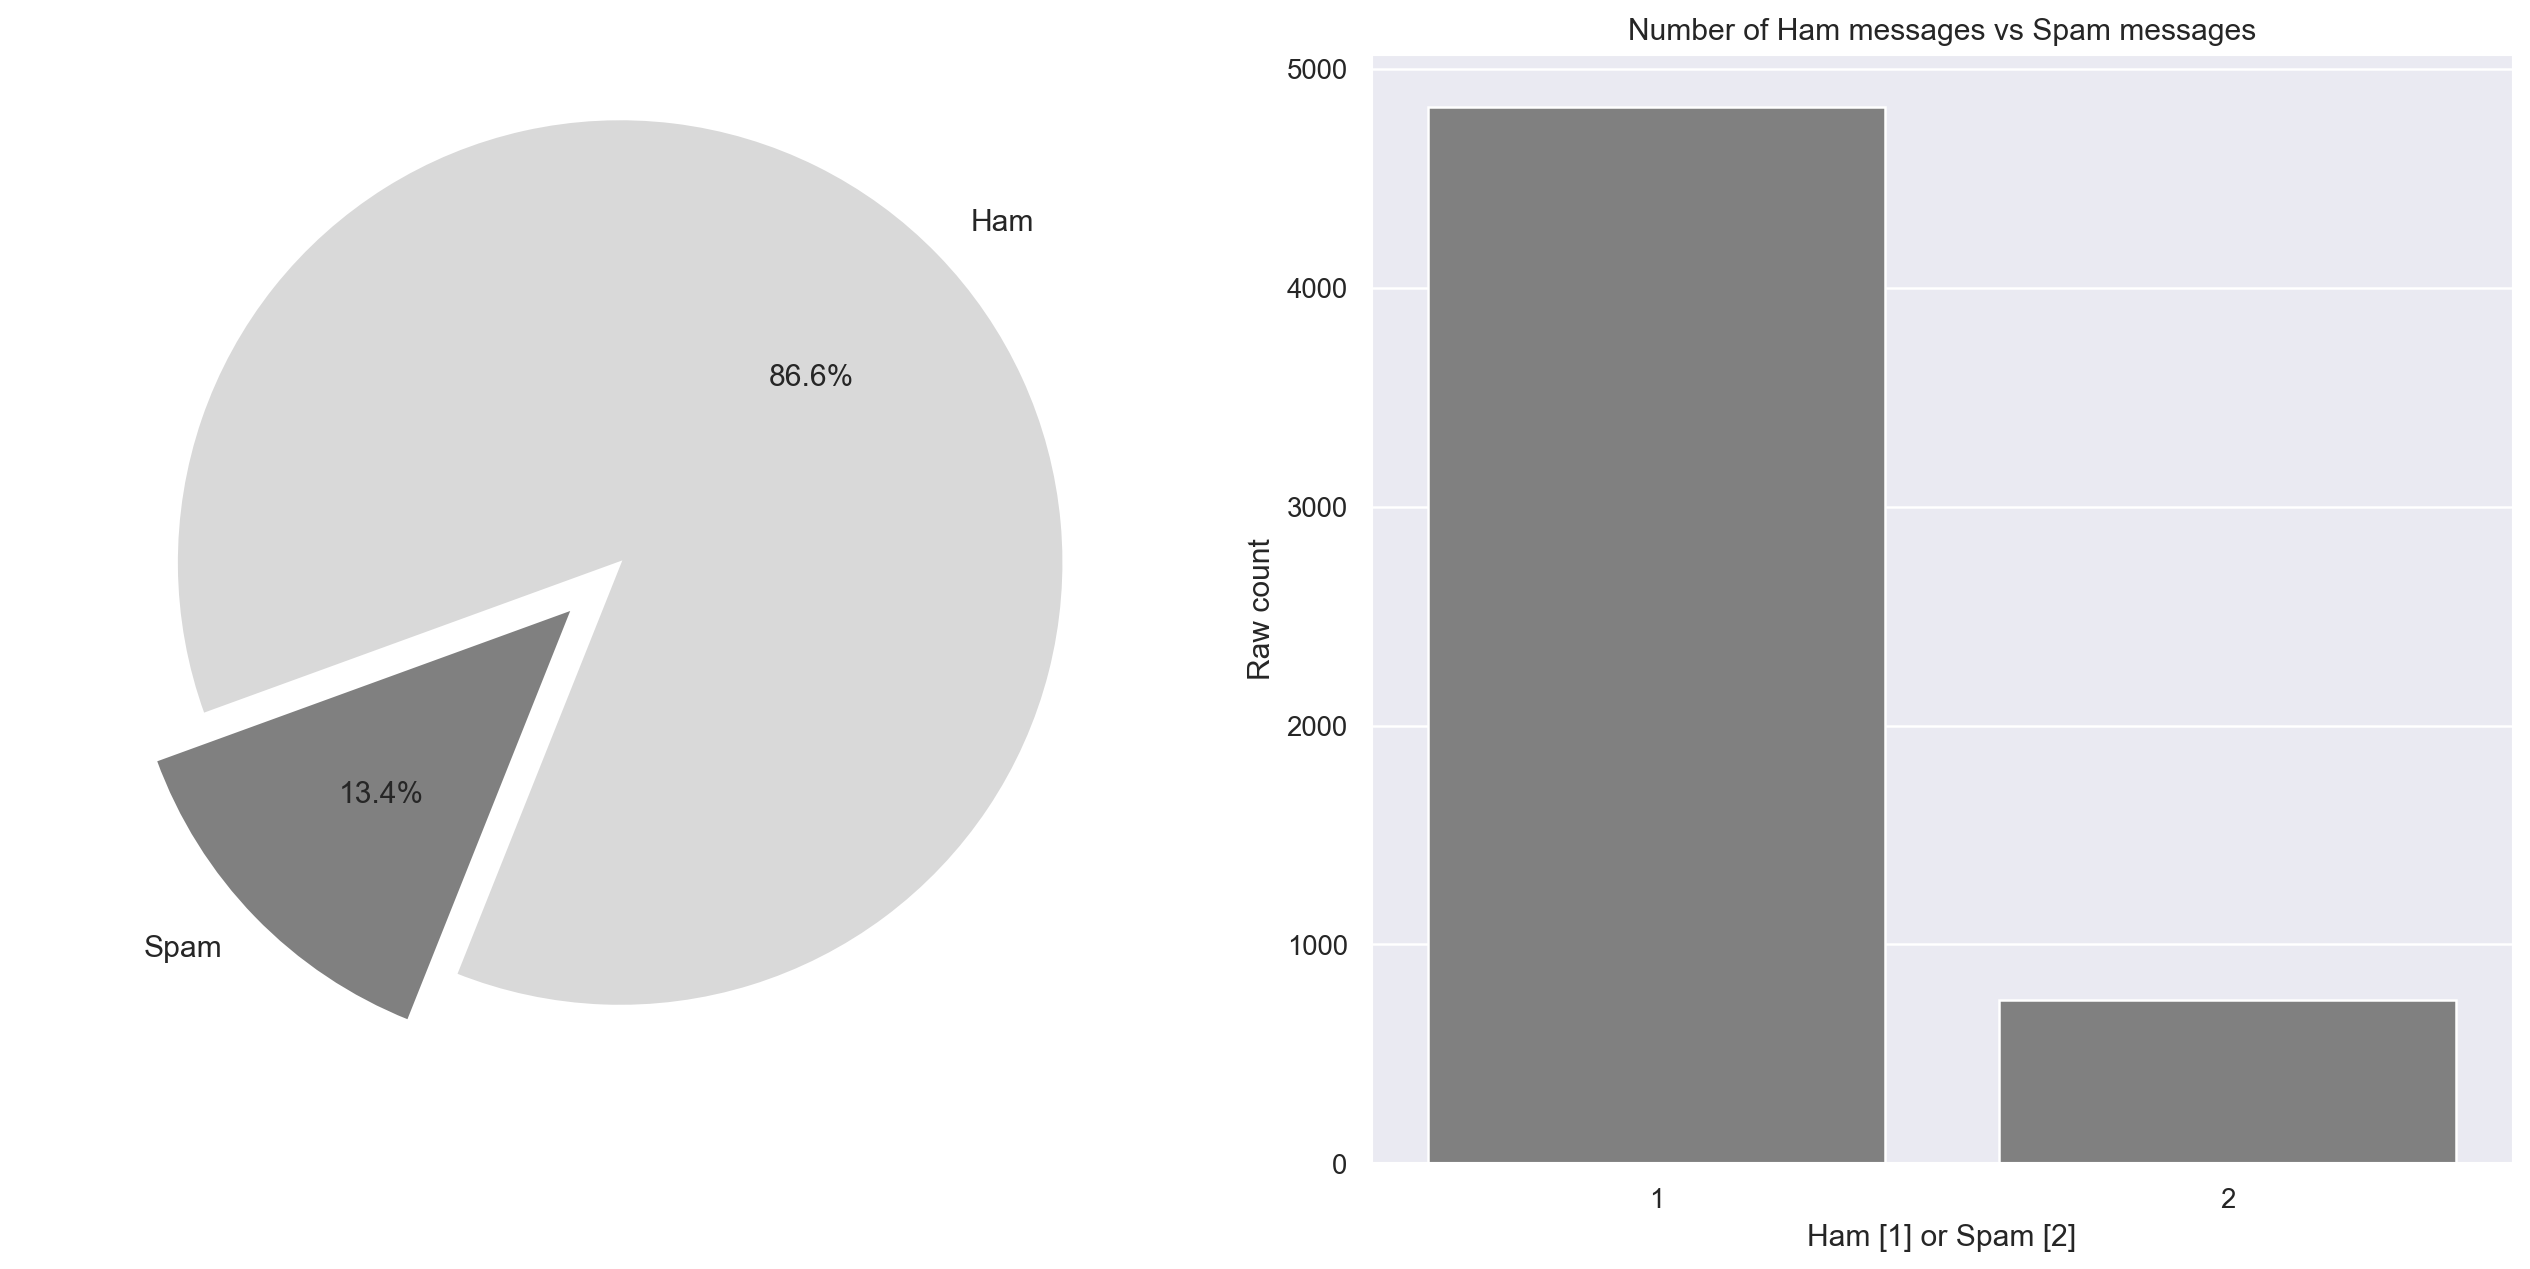

In [67]:
counts = [747, 4825]

plt.title='Number of Ham messages vs Spam messages'
plt.figure(figsize=(18, 8), dpi=180)
plt.subplot(1, 2, 1)
plt.pie(counts, labels = ['Spam', 'Ham'], textprops={'fontsize': 12}, startangle=200, colors=['#808080', '#d9d9d9'], explode=[0, 0.15], autopct='%1.1f%%')

plt.subplot(1, 2, 2)
ax = sns.barplot(x = df_new['category'].unique(), y = df_new['category'].value_counts(), color='grey')
#specfiy axis labels
ax.set(xlabel='Ham [1] or Spam [2]',
       ylabel='Raw count',
       title='Number of Ham messages vs Spam messages')


plt.show()

In [78]:
spam_text_list = df_spam.message.to_list()
ham_text_list = df_ham.message.to_list()


In [83]:
spam_text = ' '.join(spam_text_list)
ham_text = ' '.join(ham_text_list)

In [95]:
spam_cloud = WordCloud(max_words=400, height= 800, width = 1500, colormap='rocket').generate(spam_text)
ham_cloud = WordCloud(max_words=400, height= 800, width = 1500, colormap='rocket').generate(ham_text)

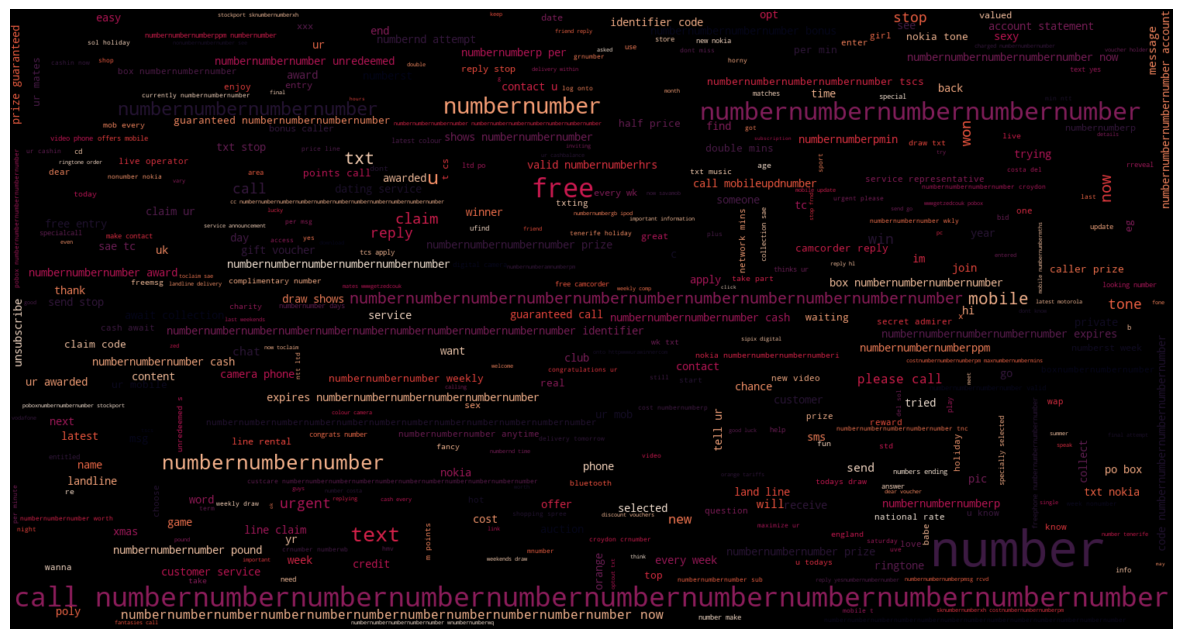

In [93]:
plt.figure(figsize = (15, 10))
plt.imshow(spam_cloud, interpolation="bilinear")
plt.axis('off')
plt.show()

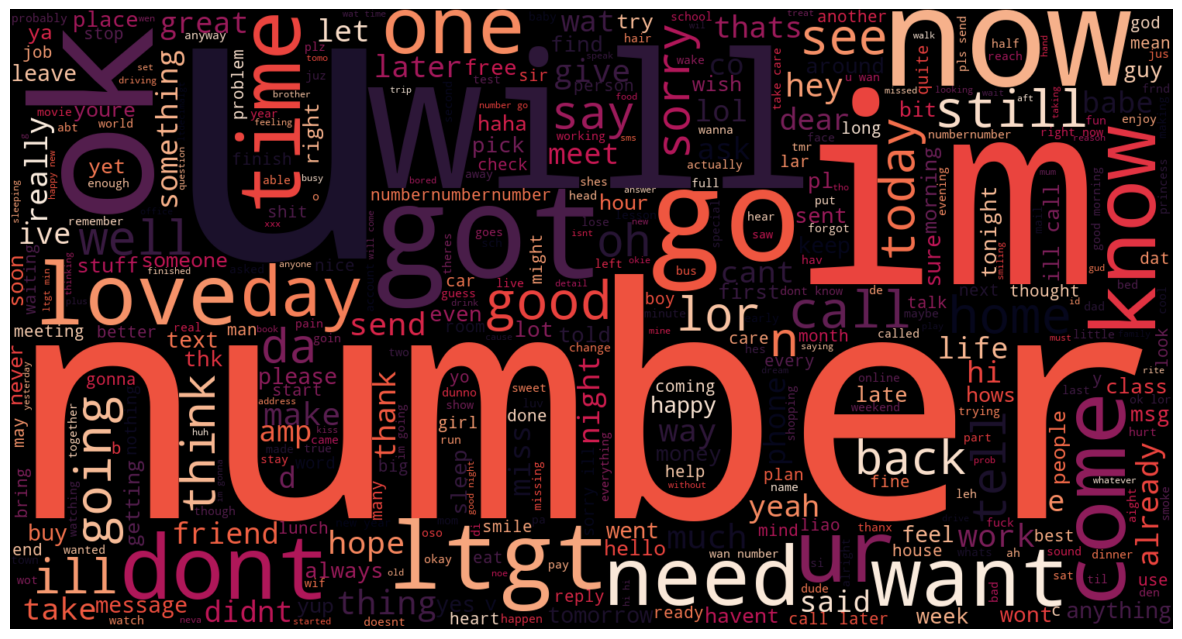

In [96]:
plt.figure(figsize = (15, 10))
plt.imshow(ham_cloud, interpolation="bilinear")
plt.axis('off')
plt.show()

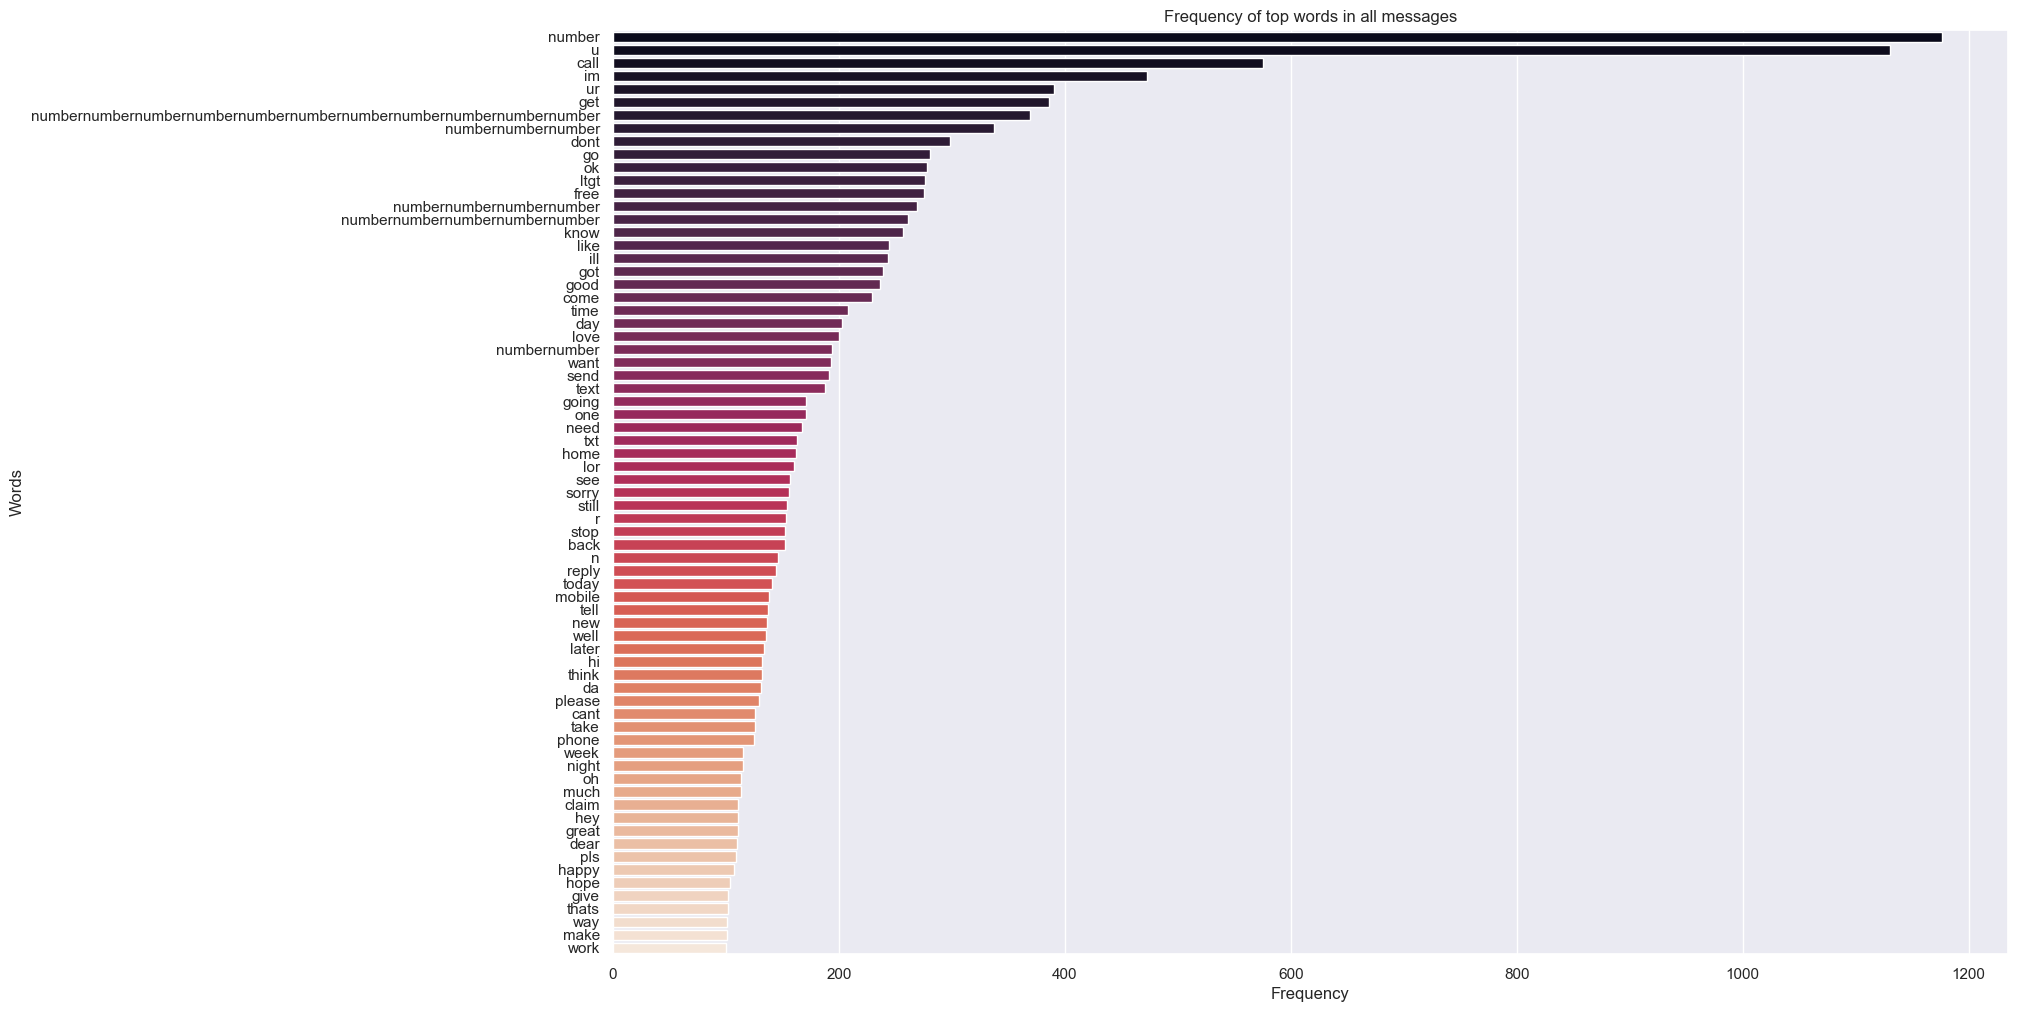

In [157]:
plt.figure(figsize=(18,12))
sns.barplot(y = word_freq_df['word'], x= word_freq_df['frequency'], palette='rocket').set(title='Frequency of top words in all messages')
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

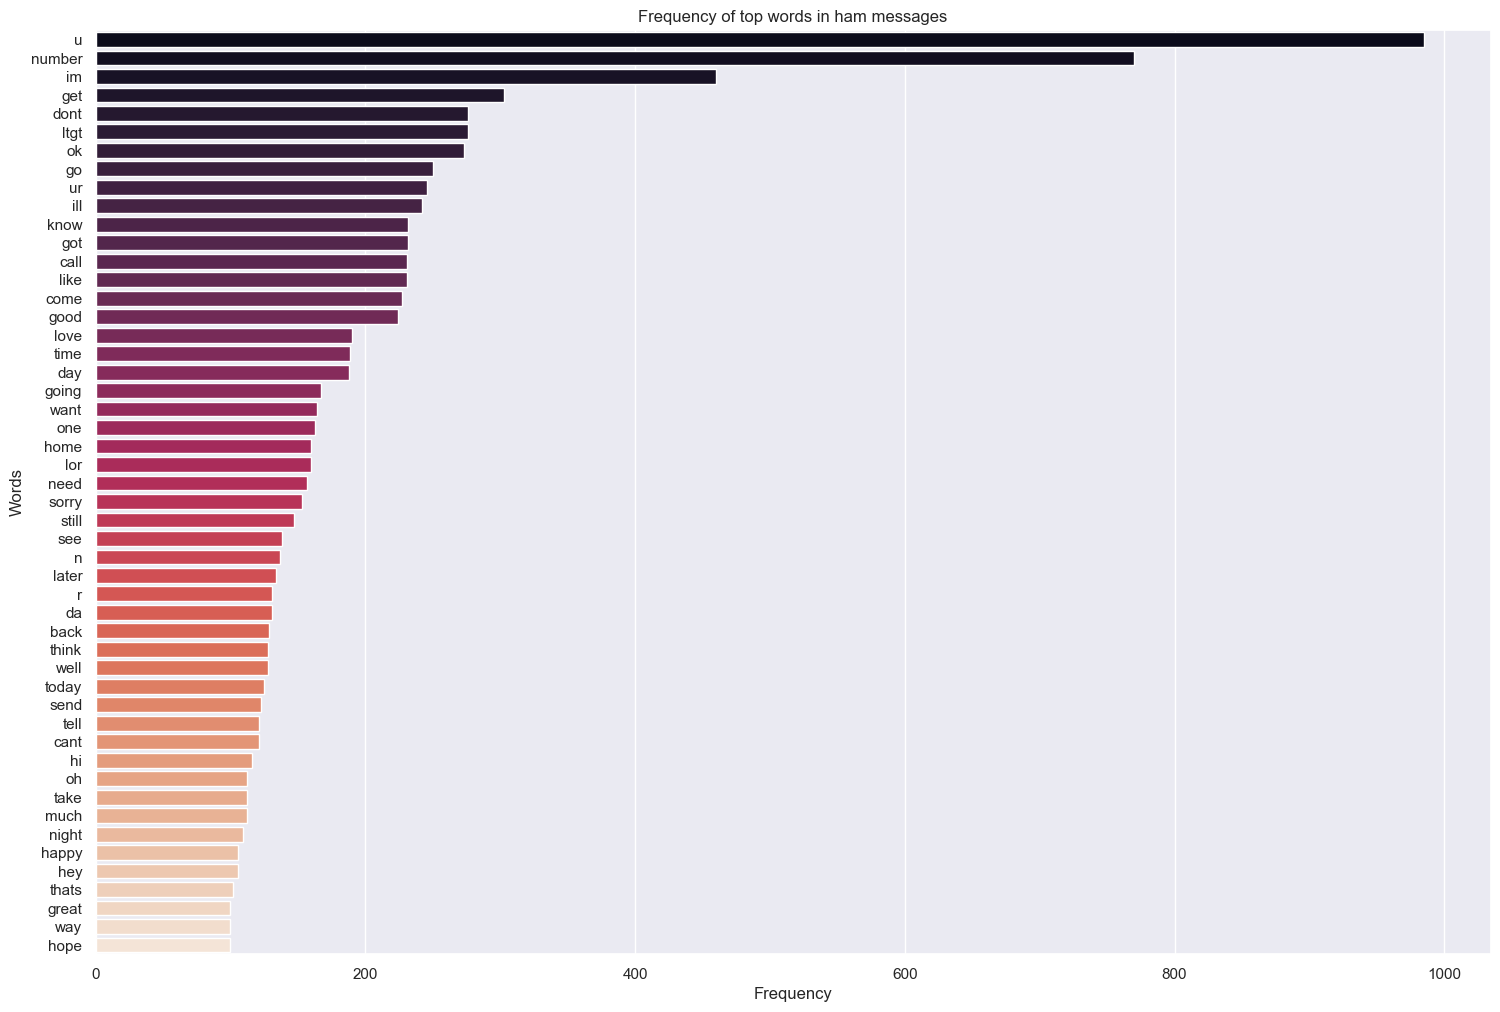

In [156]:
plt.figure(figsize=(18,12))
sns.barplot(y = ham_freq_df['word'], x= ham_freq_df['frequency'], palette='rocket').set(title='Frequency of top words in ham messages')
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

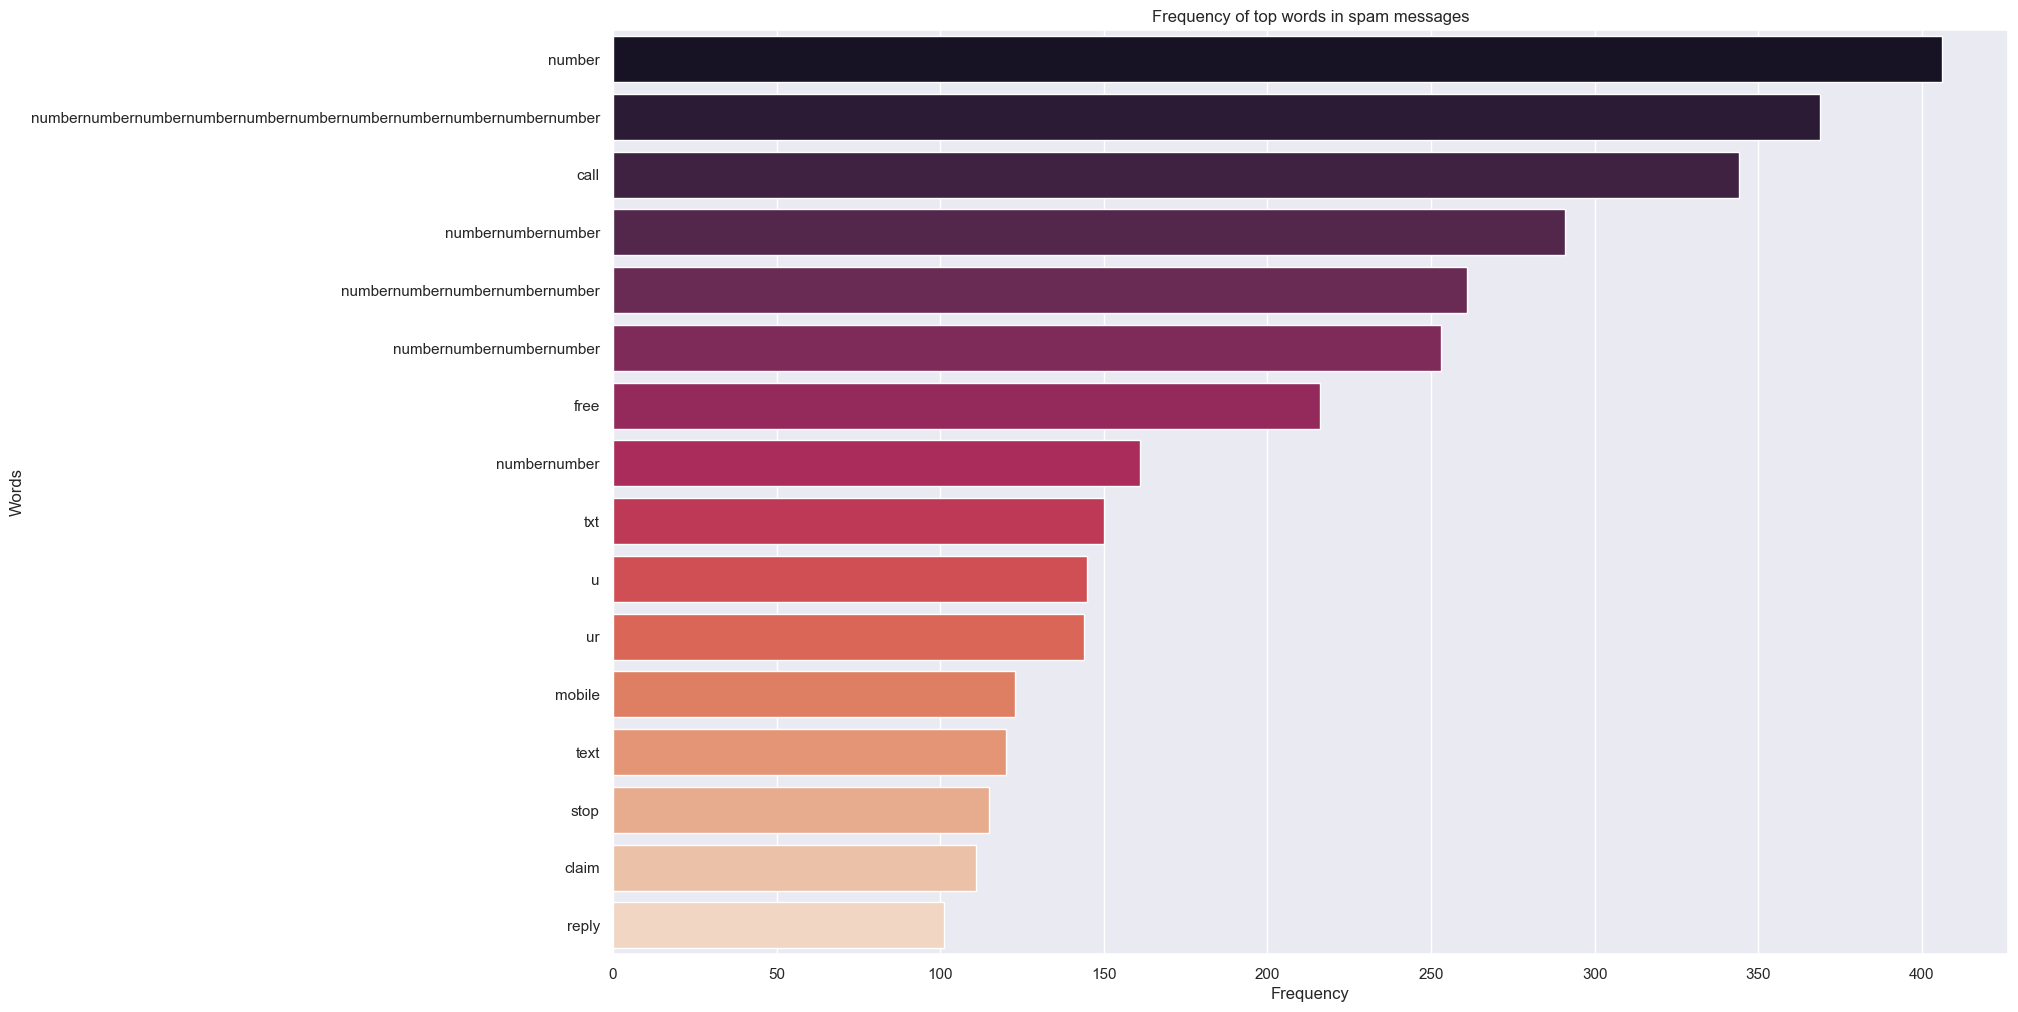

In [155]:
plt.figure(figsize=(18,12))
sns.barplot(y = spam_freq_df['word'], x= spam_freq_df['frequency'], palette='rocket').set(title='Frequency of top words in spam messages')
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()